In [25]:
import matplotlib.pyplot as plt
import numpy as np

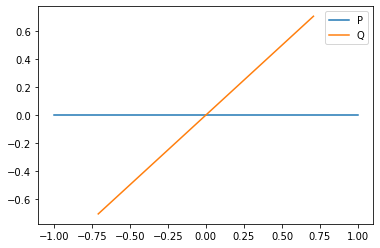

In [374]:
# Free space bird from paper
# p_coord = [[-1, -0.5], [0.5, 0.5], [-0.5,1], [-0.5,-0.5], [0.4, -0.15], [0.6, -0.3]]
# q_coord = [[-0.5, -1], [-1,0], [0,0], [0,1], [-1,0.5], [0.5,-0.5],]


p_coord = [[-1,0], [1,0]]
q_coord = [[np.cos(np.pi + np.pi/4), np.sin(np.pi + np.pi/4)], [np.cos(np.pi/4), np.sin(np.pi/4)]]

# p_coord = [[0,0.8], [0,1], [1.25,1], [1.4,0.9], [1.5,1], [2,1]]
# q_coord = [[-0.1,1], [1,1.1], [1.5,1.3], [1.8,1], [2,1]]


pxs, pys = zip(*p_coord)
qxs, qys = zip(*q_coord)

plt.figure()
plt.plot(pxs, pys, label="P")
plt.plot(qxs, qys, label="Q")
plt.legend()
plt.savefig("line_segments.pdf", format="pdf")

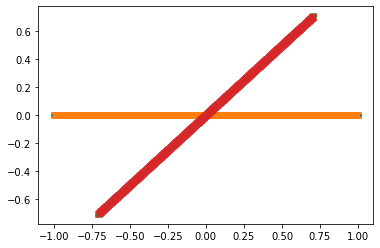

In [375]:
def interpolate_polygonal_curve(polygonal_curve):


  diffs = np.diff(polygonal_curve, axis=0)
  dists = np.linalg.norm(diffs, ord=2, axis=1)
  dist = np.sum(dists)

  distance_sample_points = np.insert(np.cumsum(dists), 0, 0, axis=0)

  x_coords, y_coords = zip(*polygonal_curve)

  new_intervals = np.linspace(0, dist, 1000)
  new_x_coords = np.interp(new_intervals, distance_sample_points, x_coords)
  new_y_coords = np.interp(new_intervals, distance_sample_points, y_coords)

  return np.vstack((new_x_coords, new_y_coords)).T

# Plot P
x_coords, y_coords = zip(*p_coord)
new_p_coords = interpolate_polygonal_curve(p_coord)
new_x_p_coords, new_y_q_coords = np.moveaxis(new_p_coords, 1, 0)

plt.plot(x_coords, y_coords, '-o')
plt.plot(new_x_p_coords, new_y_q_coords, '-x')


# Plot Q
x_coords, y_coords = zip(*q_coord)
new_q_coords = interpolate_polygonal_curve(q_coord)
new_x_q_coords, new_y_q_coords = np.moveaxis(new_q_coords, 1, 0)

plt.plot(x_coords, y_coords, '-o')
plt.plot(new_x_q_coords, new_y_q_coords, '-x')

plt.show()

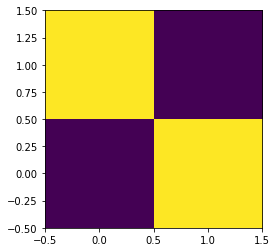

In [376]:
from scipy.spatial import distance_matrix

dists = distance_matrix(p_coord, q_coord)

plt.imshow(dists)
ax = plt.gca()
ax.invert_yaxis()

0.7653668647301795 0.7653668647301795


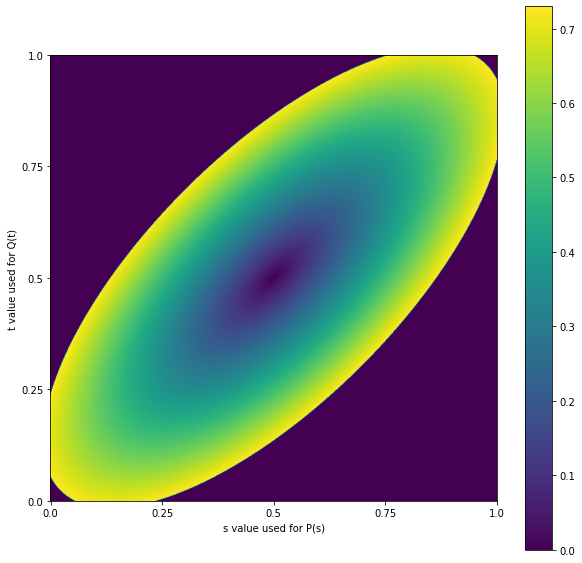

In [377]:
from scipy.spatial import distance_matrix

dists = distance_matrix(new_p_coords, new_q_coords)

print(dists[0,0], dists[-1,-1])
dists[dists  > 0.73] = 0

plt.figure(figsize=(10,10))
plt.imshow(dists.T)
plt.colorbar()
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel("s value used for P(s)")
plt.ylabel("t value used for Q(t)")
plt.xticks(np.linspace(0, len(new_p_coords), num=5), np.linspace(0,1, num=5))
plt.yticks(np.linspace(0, len(new_q_coords), num=5), np.linspace(0,1, num=5))

plt.savefig("free_space_single_cell.pdf", format="pdf")

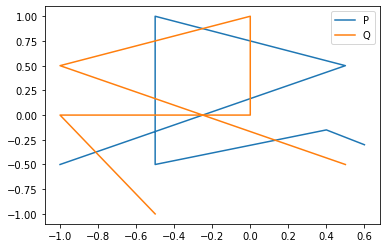

In [378]:
# Free space bird from paper
p_coord = [[-1, -0.5], [0.5, 0.5], [-0.5,1], [-0.5,-0.5], [0.4, -0.15], [0.6, -0.3]]
q_coord = [[-0.5, -1], [-1,0], [0,0], [0,1], [-1,0.5], [0.5,-0.5]]


# p_coord = [[-1,0], [1,0]]
# q_coord = [[np.cos(np.pi + np.pi/4), np.sin(np.pi + np.pi/4)], [np.cos(np.pi/4), np.sin(np.pi/4)]]

# p_coord = [[0,0.8], [0,1], [1.25,1], [1.4,0.9], [1.5,1], [2,1]]
# q_coord = [[-0.1,1], [1,1.1], [1.5,1.3], [1.8,1], [2,1]]


pxs, pys = zip(*p_coord)
qxs, qys = zip(*q_coord)

plt.figure()
plt.plot(pxs, pys, label="P")
plt.plot(qxs, qys, label="Q")
plt.legend()
plt.savefig("polygonal_curves.pdf", format="pdf")

In [379]:
new_p_coords = interpolate_polygonal_curve(p_coord)
new_q_coords = interpolate_polygonal_curve(q_coord)

0.7071067811865476 0.22360679774997896


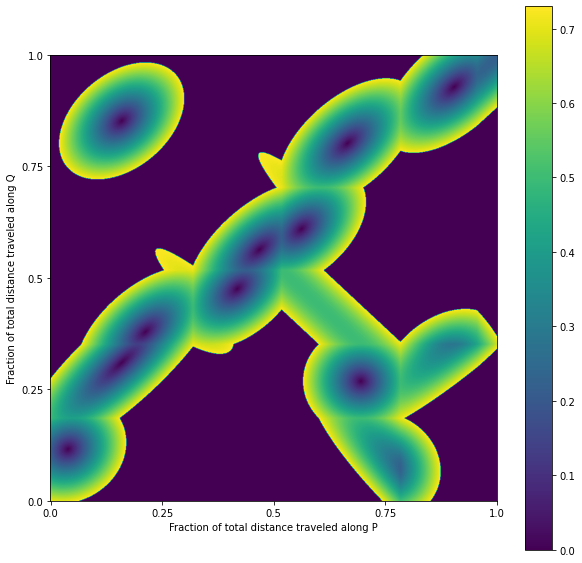

In [380]:
from scipy.spatial import distance_matrix

dists = distance_matrix(new_p_coords, new_q_coords)

print(dists[0,0], dists[-1,-1])
dists[dists  > 0.73] = 0

plt.figure(figsize=(10,10))
plt.imshow(dists.T)
plt.colorbar()
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel("Fraction of total distance traveled along P")
plt.ylabel("Fraction of total distance traveled along Q")
# plt.xticks(np.linspace(0, len(new_p_coords), num=6), np.linspace(0,len(p_coord)-1, num=6))
# plt.yticks(np.linspace(0, len(new_q_coords), num=5), np.linspace(0,len(q_coord), num=5))
plt.xticks(np.linspace(0, len(new_p_coords), num=5), np.linspace(0,1, num=5))
plt.yticks(np.linspace(0, len(new_q_coords), num=5), np.linspace(0,1, num=5))

plt.savefig("free_space_polygonal_curves.pdf", format="pdf")